# KPMG virtual internship - job simulation

## Task 1: Data Quality Assessment 
#### Assessment of data quality and completeness in preparation for analysis

Provided Datasets: Customer Demographic, Customer Addresses, Transactions data in the past 3 months

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Reading Data

In [2]:
data1 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions')
data2 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic')
data3 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress')
data4 = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList')

#### Data 1 - Transactions

In [3]:
data1.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


##### Data columns are in messed up form in data frame, they require preprocessig for better understanding of data

In [4]:
data1.columns = data1.iloc[0]
df1 = data1.iloc[1:]
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [5]:
# checking the shape of data
df1.shape

(20000, 13)

In [6]:
print(df1.isna().sum())
df11 = df1.copy()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64


#### There missing values in 7 columns. They need to be treated according to the nature of analysis

In [7]:
#checking for duplicated rows
df1.duplicated().sum()

0

#### There are no duplicate values, the data is unique

In [8]:
#chekcing for uniqueness of each column
df1.nunique()

0
transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

#### Exploring the attributes

In [9]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [10]:
df1['order_status'].value_counts()

order_status
Approved     19821
Cancelled      179
Name: count, dtype: int64

In [11]:
df1['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [12]:
df1['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [13]:
df1['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [14]:
df1['product_size'].value_counts()

product_size
medium    12990
large      3976
small      2837
Name: count, dtype: int64

In [15]:
df1['product_first_sold_date'].value_counts()

product_first_sold_date
33879    234
41064    229
37823    227
39880    222
38216    220
        ... 
41848    169
42404    168
41922    166
37659    163
34586    162
Name: count, Length: 100, dtype: int64

In [16]:
#converting data column from integer to datetime
df1['product_first_sold_date'] = pd.to_datetime(df1['product_first_sold_date'],unit='s')
df1['product_first_sold_date']

C:\Users\DELL\AppData\Local\Temp\ipykernel_15672\1696406794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['product_first_sold_date'] = pd.to_datetime(df1['product_first_sold_date'],unit='s')


1       1970-01-01 11:27:25
2       1970-01-01 11:35:01
3       1970-01-01 10:06:01
4       1970-01-01 10:02:25
5       1970-01-01 11:43:46
                ...        
19996   1970-01-01 10:30:23
19997   1970-01-01 09:52:40
19998   1970-01-01 11:13:30
19999   1970-01-01 10:36:56
20000   1970-01-01 10:05:34
Name: product_first_sold_date, Length: 20000, dtype: datetime64[ns]

#### The values shown in this respective column might not be correct as it is displaying every product sold on same date but different timings

#### Data 2 - Customer Demographic

In [17]:
data2.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [18]:
data2.columns = data2.iloc[0]
df2 = data2.iloc[1:]
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [19]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [20]:
df2.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

#### There are missing values in 5 columns, they need to be treated accordingly

In [21]:
df2.duplicated().sum()

0

##### There are no duplicated rows

In [22]:
# check for columnwise duplicate values
df2.nunique()

0
customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

#### Exploring the columns

In [23]:
df2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object', name=0)

In [24]:
df2['gender'].value_counts()

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

#### Gender categorisation is'nt proper. They needed to be more precised and category wise

In [25]:
df2['past_3_years_bike_related_purchases'].value_counts()

past_3_years_bike_related_purchases
16    56
19    56
67    54
20    54
2     50
      ..
8     28
95    27
85    27
86    27
92    24
Name: count, Length: 100, dtype: int64

In [26]:
df2['DOB'].value_counts()

DOB
1978-01-30    7
1964-07-08    4
1962-12-17    4
1978-08-19    4
1977-05-13    4
             ..
1989-06-16    1
1998-09-30    1
1985-03-11    1
1989-10-23    1
1991-11-05    1
Name: count, Length: 3448, dtype: int64

In [27]:
df2['job_title'].value_counts()

job_title
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: count, Length: 195, dtype: int64

In [28]:
df2['wealth_segment'].value_counts()

wealth_segment
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: count, dtype: int64

In [29]:
df2['deceased_indicator'].value_counts()

deceased_indicator
N    3998
Y       2
Name: count, dtype: int64

In [30]:
df2['default'].value_counts()

default
100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
testâ testâ«                               31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: count, Length: 90, dtype: int64

#### The values are not consistent, the column is irrelevant and can be dropped.

In [31]:
df21 = df2.drop('default',axis='columns')

In [32]:
df21.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,Yes,8


In [33]:
df2['owns_car'].value_counts()

owns_car
Yes    2024
No     1976
Name: count, dtype: int64

In [34]:
df2['tenure'].value_counts()

tenure
7     235
5     228
11    221
10    218
16    215
8     211
18    208
12    202
9     200
14    200
6     192
13    191
4     191
17    182
15    179
1     166
3     160
19    159
2     150
20     96
22     55
21     54
Name: count, dtype: int64

#### Data 3 - Customer Address

In [35]:
data3.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [36]:
data3.columns = data3.iloc[0]
df3 = data3.iloc[1:]
df3.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [37]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB
None


In [38]:
df3.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### There are no null values,

In [39]:
df3.duplicated().sum()

0

#### There are no duplicated rows

In [40]:
df3.nunique()

0
customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

### Exploring the columns

In [41]:
df3['postcode'].value_counts()

postcode
2170    31
2155    30
2145    30
2153    29
3977    26
        ..
3808     1
3114     1
4721     1
4799     1
3089     1
Name: count, Length: 873, dtype: int64

In [42]:
df3['state'].value_counts()

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [43]:
df3['property_valuation'].value_counts()

property_valuation
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: count, dtype: int64

#### All the columns have consistent values and apparantly correct information

#### Data 4 - New Customer List

In [44]:
data4.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125


In [45]:
#Dropping the unnamed columns
data4.drop(['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19', 'Unnamed: 20'], axis='columns', inplace=True)

In [46]:
data4.columns = data4.iloc[0]
df4 = data4.iloc[1:]
df4.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [48]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [49]:
df4.shape

(1000, 18)

In [50]:
df4.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

##### There are missing values in 4 columns, they needed to be treated accordingly

In [51]:
#check for duplicated rows
df4.duplicated().sum()

0

In [52]:
#check for columnwise duplicated values
df4.nunique()

0
first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       16
Rank                                    324
Value                                   324
dtype: int64

#### Exploring the columns

In [53]:
df4.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object', name=0)

In [54]:
df4['gender'].value_counts()

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

##### there are 17 values with gender U can be considered as unspecified

In [55]:
df4['DOB'].value_counts()

DOB
1965-07-03    2
1978-01-15    2
1979-07-28    2
1995-08-13    2
1941-07-21    2
             ..
1978-05-27    1
1945-08-08    1
1943-08-27    1
1999-10-24    1
1955-10-02    1
Name: count, Length: 961, dtype: int64

In [56]:
df4['job_industry_category'].value_counts()

job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: count, dtype: int64

In [57]:
df4['job_title'].value_counts()

job_title
Associate Professor         15
Environmental Tech          14
Software Consultant         14
Chief Design Engineer       13
Assistant Manager           12
                            ..
Accountant II                1
Programmer IV                1
Administrative Officer       1
Accounting Assistant III     1
Web Developer I              1
Name: count, Length: 184, dtype: int64

In [58]:
df4['wealth_segment'].value_counts()

wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: count, dtype: int64

In [59]:
df4['state'].value_counts()

state
NSW    506
VIC    266
QLD    228
Name: count, dtype: int64

In [60]:
df4['owns_car'].value_counts()

owns_car
No     507
Yes    493
Name: count, dtype: int64

In [61]:
df4['deceased_indicator'].value_counts()

deceased_indicator
N    1000
Name: count, dtype: int64

## Task 2: Analysis of Data and Treating high value customers

### Agenda
Data Exploration,
Model Development,
Interpretation
### Approach
Age Distribution,
Bike Purchase,
Job Industry,
Number of car owned

In [62]:
df21['DOB'].shape

(4000,)

In [63]:
df21['DOB'].isnull().sum()

87

In [64]:
df21['DOB'] = df21['DOB'].fillna(method='ffill')

In [65]:
df21['DOB'].isnull().sum()

0

In [66]:
dob = pd.to_datetime(df21['DOB'])

In [75]:
age=[]
for i in range(1,len(dob)+1):
    age.append((datetime.today().date() - dob[i].date()))
    age[i-1] = age[i-1]/365
    age[i-1] = age[i-1][2:]

TypeError: 'datetime.timedelta' object is not subscriptable

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

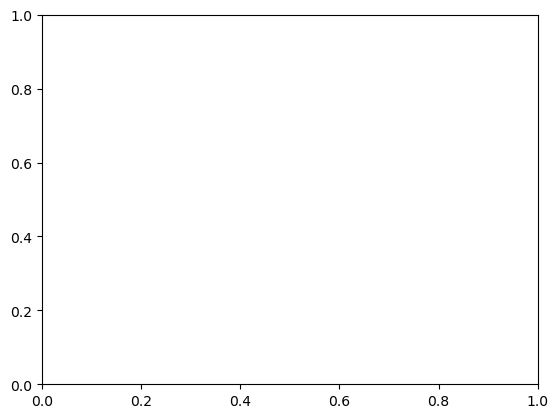

In [73]:
plt.hist(df21['Age'])